In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [2]:
path_eventos = 'events.csv.gzip'

events = pd.read_csv(path_eventos, compression='gzip', dtype={'date': 'object', 'event_id': 'Int64',\
                                                              'ref_type': 'Int64', 'ref_hash': 'Int64',\
                                                             'application_id': 'Int64', 'attributed': 'bool',\
                                                             'device_countrycode': 'Int64', 'device_os_version': 'Float64',\
                                                             'device_brand': 'Float64', 'device_model': 'Float64', 'device_city': 'Float64',\
                                                             'session_user_agent': 'Float64', 'trans_id': 'object', 'user_agent': 'Float64',\
                                                             'event_uuid': 'object', 'carrier': 'Float64', 'kind': 'Float64', 'device_os': 'Float64',\
                                                             'wifi': 'object', 'connection_type': 'object', 'ip_address': 'Int64', 'device_language': 'Float64'})

# Analisis Previo Events

In [3]:
events.shape

(2494423, 22)

Hay 22 columnas y 2494423 registros

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              Int64
ref_type              Int64
ref_hash              Int64
application_id        Int64
attributed            bool
device_countrycode    Int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            Int64
device_language       float64
dtypes: Int64(6), bool(1), float64(10), object(5)
memory usage: 416.3+ MB


In [5]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [6]:
events.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language
count,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,1.022066e+06,1.164963e+06,2.406456e+06,6.146980e+05,2.482637e+06,1.391527e+06,6.164340e+05,2.489324e+06,6.576670e+05,2.494423e+06,2.406604e+06
mean,9.970445e+01,1.794164e+18,4.641486e+18,9.910934e+01,6.333597e+18,4.986001e+18,1.633891e+18,4.478847e+18,3.832628e+18,4.719312e+18,4.856492e+18,1.470186e+18,5.364362e+18,7.251101e+18,4.620786e+18,5.865447e+18
std,1.070903e+02,1.707944e+17,2.660724e+18,5.780986e+01,1.024000e+03,2.394834e+18,1.626674e+18,2.718014e+18,8.166911e+17,1.769561e+18,2.487552e+18,2.575962e+18,2.242979e+18,5.247066e+17,2.672746e+18,2.281192e+18
min,0.000000e+00,1.494519e+18,1.633675e+14,0.000000e+00,6.333597e+18,1.004084e+16,7.949737e+16,9.530216e+14,4.355428e+16,5.527631e+15,5.072532e+15,2.248157e+17,7.758270e+16,2.748831e+18,5.287755e+12,2.025809e+16
25%,2.200000e+01,1.891515e+18,2.326142e+18,6.300000e+01,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,3.800080e+18,3.819516e+18,2.723465e+18,2.248157e+17,4.647949e+18,6.941825e+18,2.333410e+18,3.301378e+18
50%,3.100000e+01,1.891515e+18,4.688964e+18,6.600000e+01,6.333597e+18,4.353750e+18,5.137992e+17,4.430579e+18,3.800080e+18,3.819516e+18,5.022936e+18,2.248157e+17,5.500848e+18,7.531669e+18,4.541498e+18,6.804428e+18
75%,1.610000e+02,1.891515e+18,6.927594e+18,1.450000e+02,6.333597e+18,7.391844e+18,2.987569e+18,6.882415e+18,3.800080e+18,7.164321e+18,6.840860e+18,1.179587e+18,6.169667e+18,7.531669e+18,7.044307e+18,6.977049e+18
max,7.120000e+02,1.891515e+18,9.223316e+18,3.220000e+02,6.333597e+18,9.135482e+18,9.178260e+18,9.222450e+18,9.205669e+18,9.220949e+18,9.223277e+18,9.182957e+18,9.215473e+18,7.531669e+18,9.223367e+18,9.187882e+18


In [7]:
# Damos formato a la fecha.
events['timestamp_format'] = pd.to_datetime(events['date'])

# Agrego columna fecha
events['date'] = events['timestamp_format'].dt.date
# Agrego columna de mes.
events['month'] = events['timestamp_format'].dt.month
# Agrego columna nombre dia.
events['weekday_name'] = events['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
events['day'] = events['timestamp_format'].dt.day
# Agrego columna de horas
events['hour'] = events['timestamp_format'].dt.hour

# Id Evento como categoria
events['event_category'] = events['event_id'].astype('category')

# Analisis Temporal

Antes de comenzar con el analisis, es necesario saber en cual rango de fechas estamos trabajando.

In [8]:
# fecha minima
events['timestamp_format'].min()

Timestamp('2019-03-05 00:00:00.255000')

In [9]:
# fecha maxima
events['timestamp_format'].max()

Timestamp('2019-03-13 23:59:59.984000')

Los primeros datos son del 5 de marzo de 2019 y el ultimo del 13 de marzo de 2019 (ambos dias limites estan incluidos en el rango de datos validos ya que parece haber data del dia completo)

# ¿Cuantos eventos se registraron por dia?

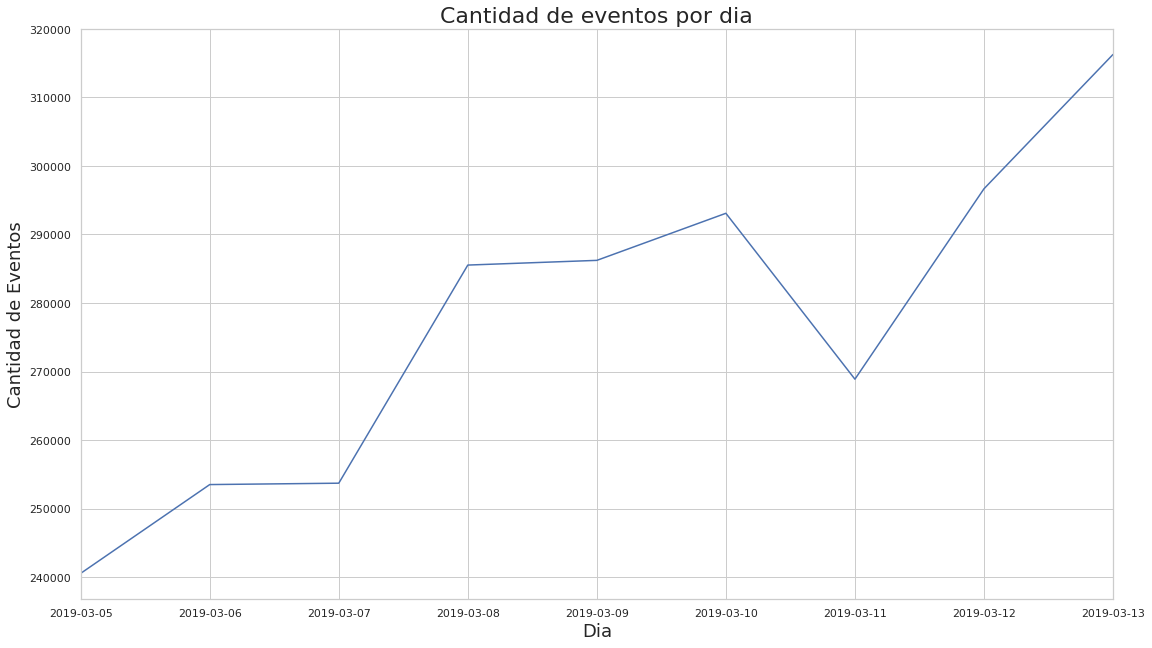

In [12]:
eventos_totales = events.groupby('date')['event_category'].count()
g = eventos_totales.plot()
g.set_title("Cantidad de eventos por dia", fontsize=22)
g.set_xlabel("Dia", fontsize=18)
g.set_ylabel("Cantidad de Eventos", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/cant_eventos_dia.png')

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


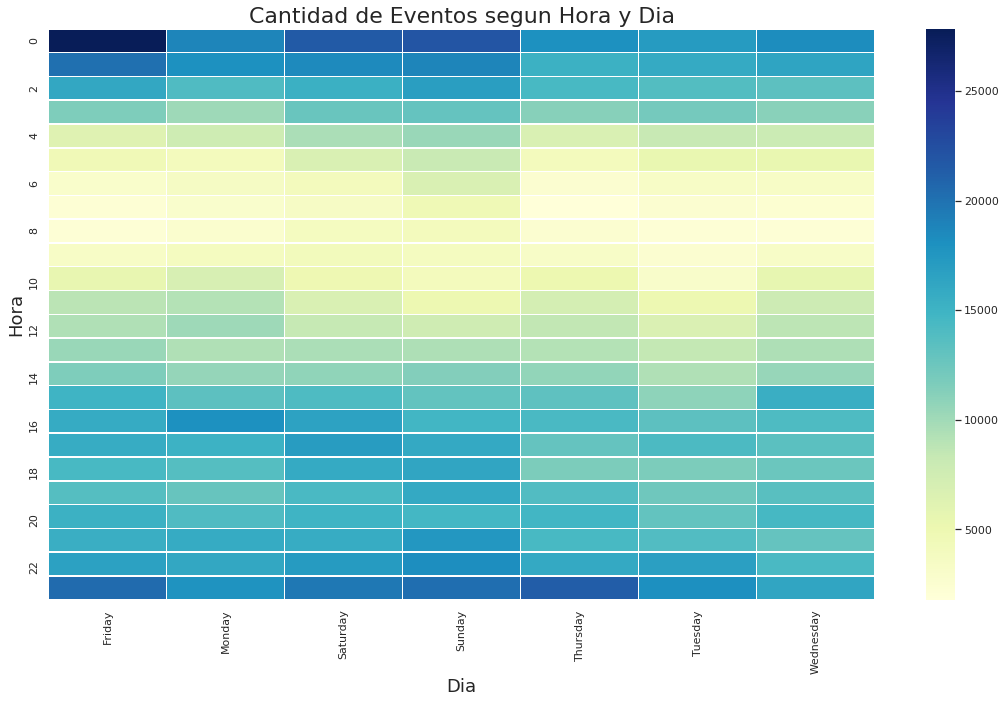

In [13]:
### Cantidad de eventos por combinacion de hora en el dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
data_semanal = events.loc[events['day'] < 12,:]
data_semanal['event_contador'] = 1
for_heatmap_hr_day = data_semanal.pivot_table(index='hour', columns='weekday_name', values='event_contador', aggfunc='sum')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=False porque muestra numeros exponenciales
g.set_title("Cantidad de Eventos segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/eventos_hr_dia.png')

Los eventos parecen estar distribuidos de manera uniforme en los distintos dias. En cuanto a la distribucion horaria, el rango de horarios con menor cantidad de eventos es de 4am a 9am. El de mayor cantidad de eventos es desde las 10pm hasta las 2am del siguiente dia.

# Analisis general

# ¿Cuales son las aplicaciones que registran la mayor cantidad de eventos?

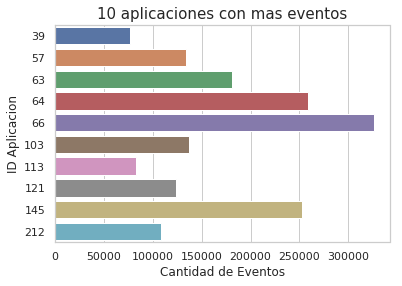

In [16]:
top_aplicaciones = events.groupby('application_id')['event_category'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=top_aplicaciones.values, y=top_aplicaciones.index, orient='h')
g.set_title("10 aplicaciones con mas eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("ID Aplicacion", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_aplicaciones_eventos.png')

Las aplicaciones 66, 64 y 145 son las que registran mayor cantidad de eventos. En el 4to puesto queda la aplicacion 63.

# Cuales son los users que generan mas eventos?

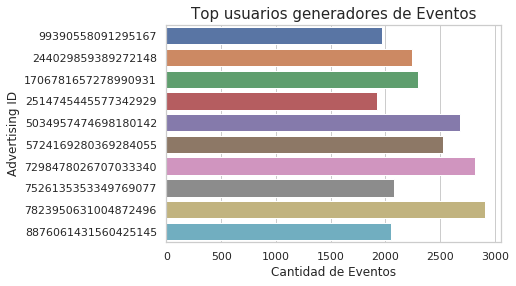

In [17]:
top_users = events.groupby('ref_hash')['event_category'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=top_users.values, y=top_users.index, orient='h')
g.set_title("Top usuarios generadores de Eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("Advertising ID", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_users_gen_eve.png')

# Cuales son los eventos mas populares segun su tipo?

In [18]:
top_events_kind = events.groupby('kind', as_index=False)['event_category'].count().sort_values(by='event_category', ascending=False)[:10]
top_events_kind

,kind,event_category
320,5.500848e+18,618217
295,5.104972e+18,300632
573,9.066788e+18,217846
41,9.977660e+17,151445
551,8.820572e+18,110045
271,4.647949e+18,100029
173,3.209078e+18,84898
114,2.376750e+18,56489
453,7.320636e+18,52726
223,4.017674e+18,43936


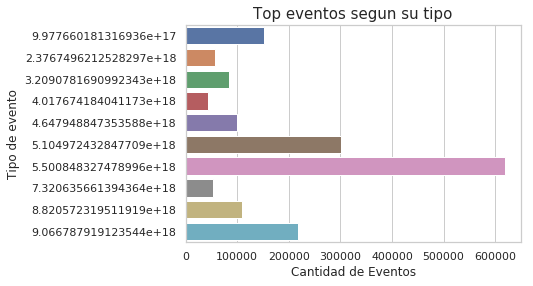

In [19]:
g = sns.barplot(x=top_events_kind['event_category'].values, y=top_events_kind['kind'].values, orient='h')
g.set_title("Top eventos segun su tipo", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("Tipo de evento", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_events_kind.png')

# Cantidad de eventos por transaccion segun el tipo de evento

In [20]:
events.groupby('trans_id')['event_category'].count()

trans_id
0                                                                                                                16
0941bb7b-866f-4d5a-9b85-63e77b27d562                                                                              2
103430dcab4b60eb4f                                                                                                9
1500439142mb23318419296                                                                                           1
1901171053a509cd7317f2c6                                                                                          2
210a4c5786d249c78bb30237abcac890_Y2NhPTQvMjEvMjAxOCA1OjI2OjM3IFBNJm9mZmVySWQ9MzM0NTY0NDYmYWZmSWQ9MTY2MTgxNQ==     6
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx     7
57d62969                                                                                                          1
57ff03c8                                                       

In [21]:
# Filtro algunos valores que no tienen sentido
events_0 = events.loc[events['trans_id'] != '{hash}']
events_filtrado = events_0.loc[events['trans_id'] != '0']

In [22]:
df_trans = pd.DataFrame(events_filtrado.groupby(['trans_id', 'event_category'])['event_category'].count())
df_trans.columns = ['count']
# Pivot table, cantidad de ocurrencias por dia de la semana de eventos para transactions
tabla = pd.pivot_table(df_trans,values='count',columns='event_category', \
                         index='trans_id', fill_value=0)

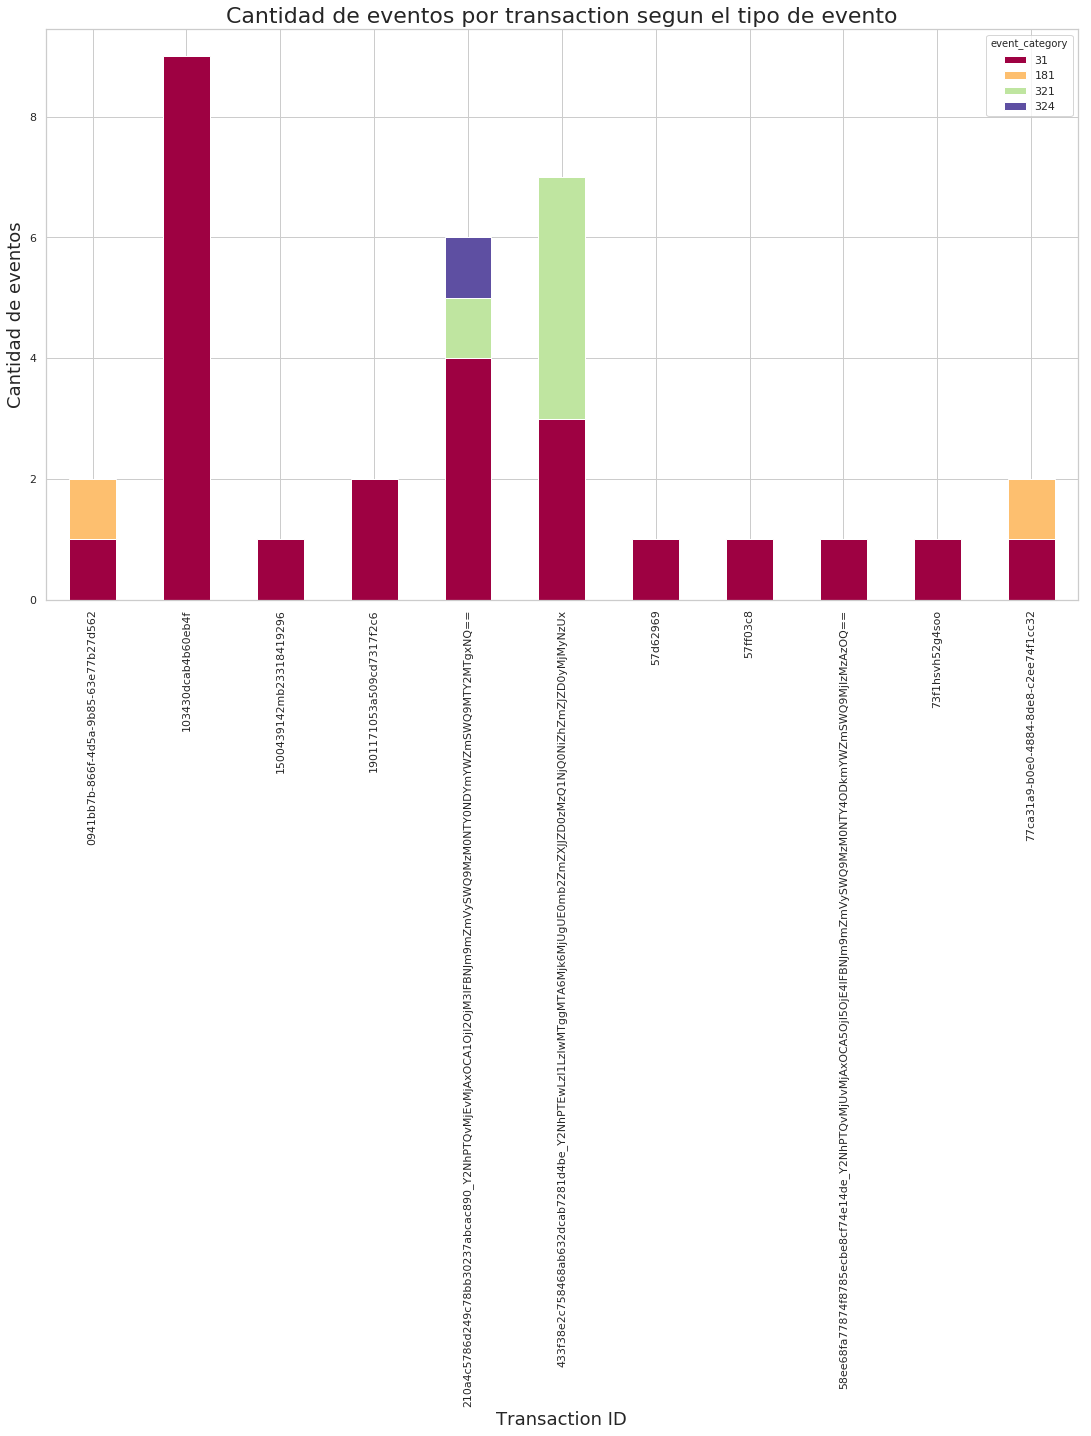

In [23]:
# Plot
f = plt.figure()
plt.title('Cantidad de eventos por transaction segun el tipo de evento', fontsize=22)
ax = tabla.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(18.5,10.5), ax=f.gca())
ax.set_ylabel('Cantidad de eventos', fontsize=18);
ax.set_xlabel('Transaction ID', fontsize=18);
plt.show()


f.set_size_inches(18.5, 10.5, forward=True)
f.savefig('img/eventos_por_transaction.png')

El evento con categoria 33 esta presente en todas las transacciones (en alguna mas de una vez)

# Analisis de eventos atribuidos a Jampp

In [24]:
# Filtro attributed == True
attributed = events.loc[events['attributed'] == True]

In [25]:
attributed.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language,month,day,hour
count,5099.000000,5.099000e+03,5.099000e+03,5099.000000,5.099000e+03,7.280000e+02,3.945000e+03,5.073000e+03,7.050000e+02,0.0,4.345000e+03,7.160000e+02,0.0,7.100000e+02,5.099000e+03,5.073000e+03,5099.0,5099.000000,5099.000000
mean,177.642283,1.848071e+18,4.753640e+18,65.294175,6.333597e+18,5.778776e+18,1.752667e+18,4.724182e+18,3.429597e+18,NaN,4.671346e+18,1.341886e+18,NaN,7.423670e+18,4.567571e+18,6.424512e+18,3.0,8.350069,12.850559
std,178.591614,1.239471e+17,2.589304e+18,50.035023,2.048201e+03,2.939461e+18,1.510637e+18,2.612597e+18,1.230506e+18,NaN,2.577484e+18,2.561288e+18,NaN,2.282817e+17,2.697129e+18,2.489907e+18,0.0,2.643160,7.939331
min,1.000000,1.494519e+18,3.734549e+15,7.000000,6.333597e+18,5.908703e+17,3.083059e+17,5.112505e+16,6.276066e+17,NaN,1.670798e+16,2.248157e+17,NaN,6.941825e+18,3.524415e+14,1.101539e+17,3.0,5.000000,0.000000
25%,31.000000,1.891515e+18,2.724491e+18,29.000000,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,2.551781e+18,NaN,2.394269e+18,2.248157e+17,NaN,7.531669e+18,2.357159e+18,4.621024e+18,3.0,6.000000,3.000000
50%,155.000000,1.891515e+18,4.889606e+18,63.000000,6.333597e+18,5.940957e+18,2.208835e+18,4.445252e+18,3.800080e+18,NaN,4.859238e+18,2.248157e+17,NaN,7.531669e+18,4.378898e+18,6.977049e+18,3.0,8.000000,15.000000
75%,204.000000,1.891515e+18,6.965690e+18,63.000000,6.333597e+18,8.824599e+18,2.987569e+18,7.116343e+18,3.800080e+18,NaN,6.741680e+18,2.248157e+17,NaN,7.531669e+18,7.084933e+18,9.028383e+18,3.0,11.000000,20.000000
max,608.000000,1.891515e+18,9.220804e+18,288.000000,6.333597e+18,8.840146e+18,8.392673e+18,9.221733e+18,8.985217e+18,NaN,9.195681e+18,8.005034e+18,NaN,7.531669e+18,9.221950e+18,9.028383e+18,3.0,13.000000,23.000000


Los eventos attributed no tienen ni kind ni session_user_agent

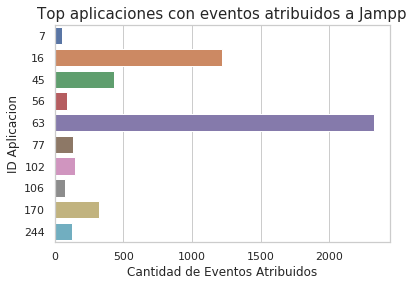

In [26]:
top_aplicaciones_attributed = attributed.groupby('application_id')['event_category'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=top_aplicaciones_attributed.values, y=top_aplicaciones_attributed.index, orient='h')
g.set_title("Top aplicaciones con eventos atribuidos a Jampp", fontsize=15)
g.set_xlabel("Cantidad de Eventos Atribuidos", fontsize=12)
g.set_ylabel("ID Aplicacion", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_aplicaciones_atribuidos.png')

La aplicacion 63 es la que mas eventos le atribuye a Jampp, tambien era la 4ta que mas eventos habia generado. En el 2do puesto aparece la aplicacion 16 que no aparece entre las 10 apps que mas eventos generan.

# Tipo de conexion a internet para eventos atribuidos por dia

In [27]:
data_semanal = attributed.loc[events['day'] < 12,:]
connection_type_weekday = pd.DataFrame(data_semanal.groupby(['connection_type', 'weekday_name'])['connection_type'].agg('count'))
connection_type_weekday.columns = ['count']
connection_type_weekday

count
connection_type weekday_name       
Cable/DSL       Friday           69
                Monday           87
                Saturday         41
                Sunday           43
                Thursday         84
                Tuesday          39
                Wednesday        48
Cellular        Friday           32
                Monday           30
                Saturday         15
                Sunday            3
                Thursday         20
                Tuesday          12
                Wednesday        28

In [28]:
# Pivot table, cantidad de ocurrencias por dia de la semana segun connection type
tabla_connection_type_weekday = pd.pivot_table(connection_type_weekday,values='count',columns='connection_type', \
                         index='weekday_name', fill_value=0)
tabla_connection_type_weekday

connection_type,Cable/DSL,Cellular
weekday_name,,
Friday,69,32
Monday,87,30
Saturday,41,15
Sunday,43,3
Thursday,84,20
Tuesday,39,12
Wednesday,48,28


In [29]:
# "Normalizo".
tabla_connection_type_weekday = tabla_connection_type_weekday.divide(tabla_connection_type_weekday.sum(axis=1), axis=0)
tabla_connection_type_weekday

connection_type,Cable/DSL,Cellular
weekday_name,,
Friday,0.683168,0.316832
Monday,0.743590,0.256410
Saturday,0.732143,0.267857
Sunday,0.934783,0.065217
Thursday,0.807692,0.192308
Tuesday,0.764706,0.235294
Wednesday,0.631579,0.368421


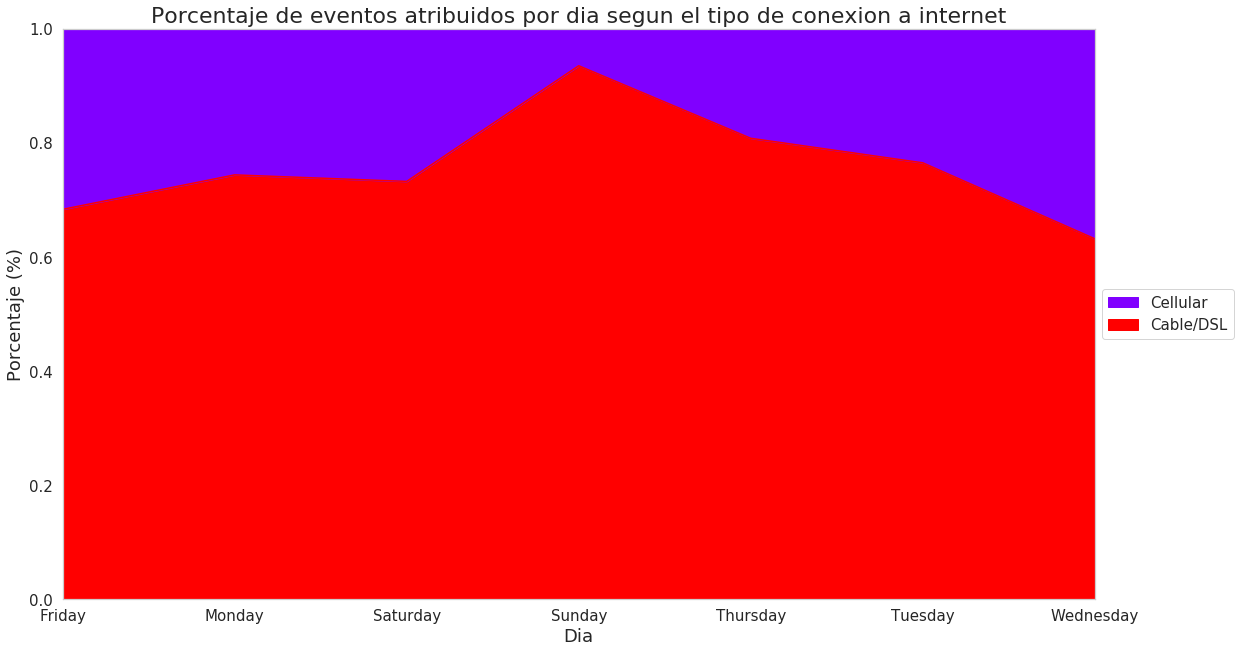

In [34]:
# Plot 
f = plt.figure()
ax = tabla_connection_type_weekday.plot(kind='area', stacked=True, colormap='rainbow_r', figsize=(18.5, 10.5), ax=f.gca(), fontsize=15)
# Config labels y handels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
plt.title('Porcentaje de eventos atribuidos por dia segun el tipo de conexion a internet', fontsize=22)
ax.set_ylabel('Porcentaje (%)', fontsize=18);
ax.set_xlabel('Dia', fontsize=18);
# Limites grafico
ax.set_ylim(0,1)
ax.set_xlim(0,6)
plt.show()

f.set_size_inches(18.5, 10.5, forward=True)
f.savefig('img/connection_type_weekday_attributed.png')